In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [33]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Input
from tensorflow.keras.callbacks import EarlyStopping

### Data Analysis

In [4]:
df = pd.read_csv('/home/alvaro/tf_templates/DATA/RSCCASN.csv', index_col='DATE', parse_dates=True)
df.head()

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


In [5]:
df.columns = ['Sales']

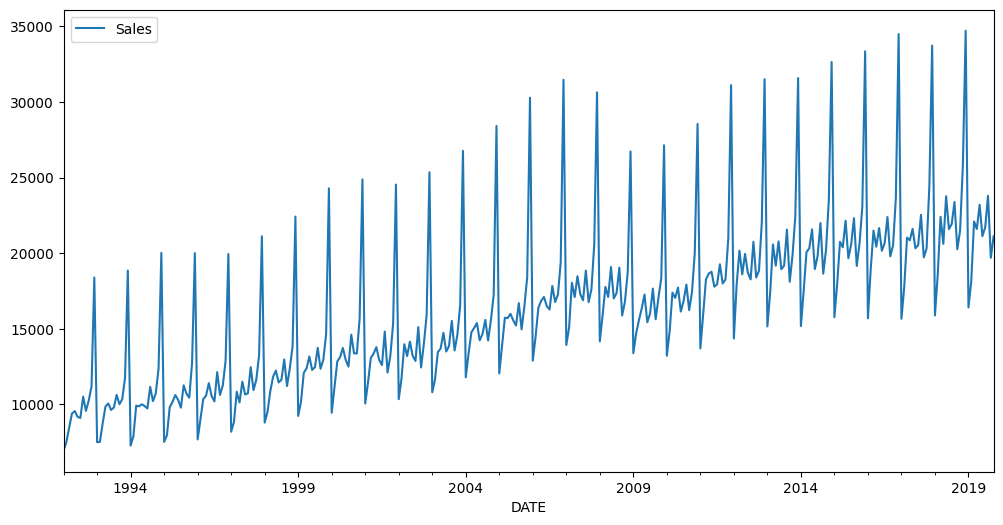

In [6]:
df.plot(figsize=(12,6));

### Train Test Split

In [7]:
test_size = 18 # 18 months
test_ind = len(df) - test_size

In [8]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

### Scale Data

In [9]:
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train)
scaled_test = scaler.transform(test)

### Time Series Generator

In [10]:
length = 12
batch_size = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)
validation_generator = TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=batch_size)

### Model Training

In [11]:
n_features = 1

In [34]:
model = Sequential([
    Input(shape=(length, n_features)),
    SimpleRNN(units=100, activation='relu'),
    Dense(units=1)
])

In [35]:
model.compile(optimizer='adam', loss='mse')

In [36]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [37]:
model.fit(generator, epochs=100, validation_data=validation_generator, callbacks=[early_stop])

Epoch 1/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0498 - val_loss: 0.0026
Epoch 2/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0075 - val_loss: 0.0018
Epoch 3/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0027 - val_loss: 0.0023
Epoch 4/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0041 - val_loss: 0.0013
Epoch 5/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0035 - val_loss: 9.3234e-04
Epoch 6/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0013 - val_loss: 0.0023
Epoch 7/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0020 - val_loss: 9.1491e-04
Epoch 8/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 9/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0021 - val_loss: 5.8842e-04
Epoch 10/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0020 - val_loss: 0.0010
Epoch 11/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0019 - val_loss: 9.0291e-04
Epoch 12/100
304/304 ━━━

### Evaluation

In [38]:
history = pd.DataFrame(model.history.history)

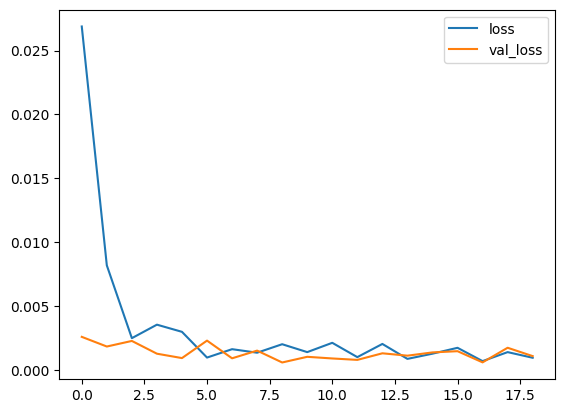

In [39]:
history[['loss', 'val_loss']].plot();

In [40]:
test_predictions = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(scaled_test)):
    current_prediction = model.predict(current_batch)[0]
    test_predictions.append(current_prediction)
    current_batch = np.append(current_batch[:, 1:, :], [[current_prediction]], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [41]:
predictions = scaler.inverse_transform(test_predictions)
test.loc[:, 'Predictions'] = predictions

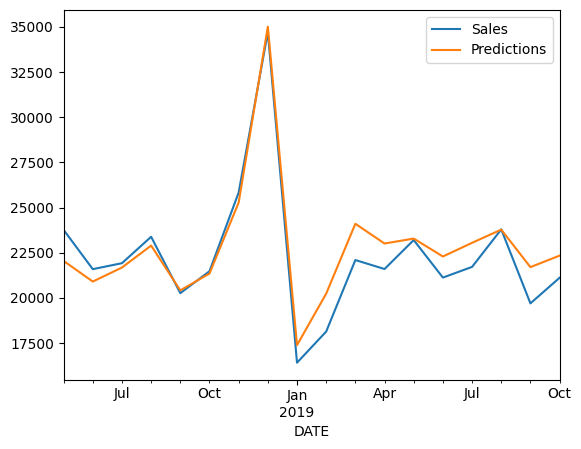

In [42]:
test.plot();

In [43]:
y_test = test['Sales'].values

mean_absolute_error(y_test, predictions)

921.851095782386

In [44]:
np.sqrt(mean_squared_error(y_test, predictions))

np.float64(1159.7720518895376)

In [45]:
explained_variance_score(y_test, predictions)

0.9178130825477685

### Forecasting

In [46]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

In [47]:
forecast = []
periods = 12
first_eval_batch = scaled_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    current_prediction = model.predict(current_batch)[0]
    forecast.append(current_prediction)
    current_batch = np.append(current_batch[:, 1:, :], [[current_prediction]], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [48]:
forecast = scaler.inverse_transform(forecast)

In [49]:
forecast

array([[25593.34726143],
       [35581.27078247],
       [17080.23196983],
       [19991.58247566],
       [23852.75285816],
       [23177.02776623],
       [23518.00521374],
       [22214.52153444],
       [23192.97632694],
       [24658.93307209],
       [21508.01320457],
       [22531.01175117]])

In [50]:
df

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [51]:
forecast_index = pd.date_range(start='2019-11-01', periods=periods, freq='MS')

In [52]:
forecast_df = pd.DataFrame(data=forecast, index=forecast_index, columns=['Forecast'])

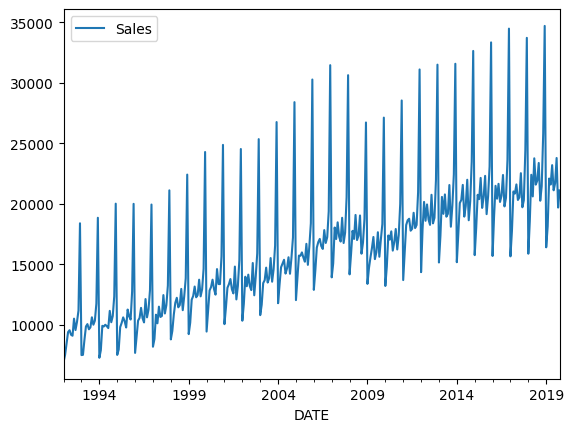

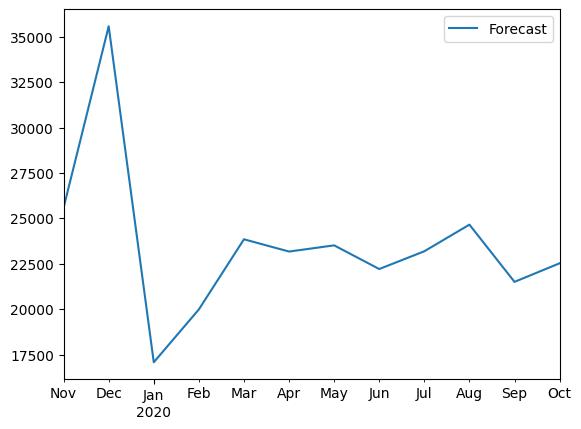

In [53]:
df.plot()
forecast_df.plot();

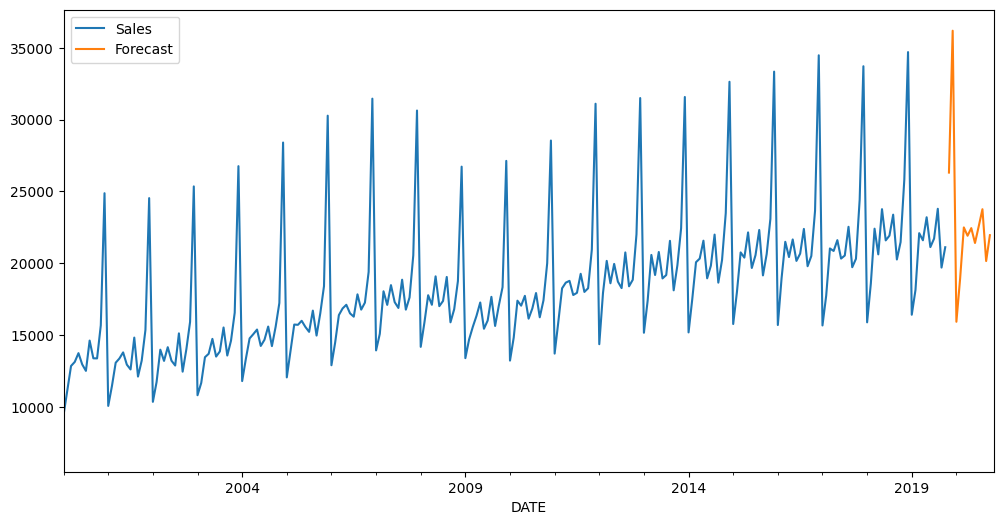

In [32]:
forecast_df.plot(ax=df.plot(), figsize=(12,6))
plt.xlim('2000-01-01', '2020-11-01');